Model and scaler loaded successfully.


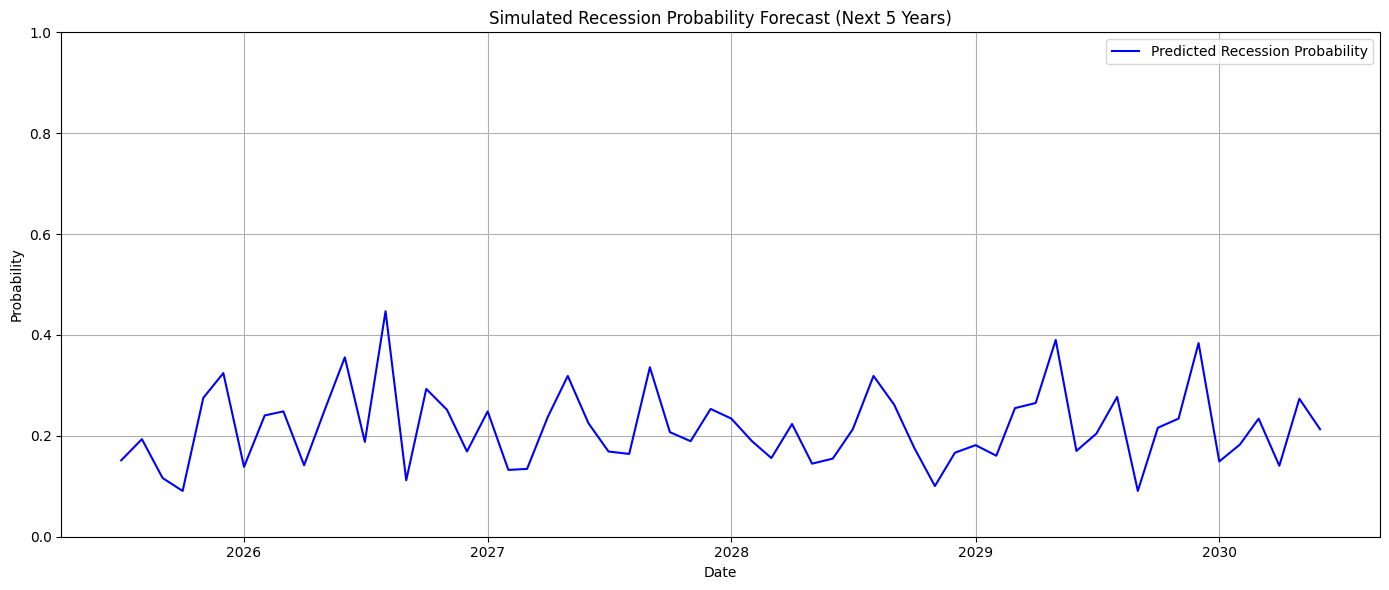

,DATE,Yield_10Y,Yield_3M,Spread,Recession_Prob
0,2025-07-01 00:00:29.213355,4.15,3.96,0.19,0.151461
1,2025-08-01 00:00:29.213355,3.96,4.11,-0.15,0.193415
2,2025-09-01 00:00:29.213355,4.19,3.65,0.54,0.116388
3,2025-10-01 00:00:29.213355,4.46,3.60,0.86,0.090715
4,2025-11-01 00:00:29.213355,3.93,4.61,-0.68,0.275323


In [7]:
import joblib
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt

# Paths to saved model and scaler
MODEL_PATH = "/Users/rohanjain/Desktop/UMD - MSML/Summer 25/Recession_BondsYield/outputs/model/logistic_model.pkl"
SCALER_PATH = "/Users/rohanjain/Desktop/UMD - MSML/Summer 25/Recession_BondsYield/outputs/model/scaler.pkl"

# Load the trained logistic regression model and scaler
model = joblib.load(MODEL_PATH)
scaler = joblib.load(SCALER_PATH)

print("Model and scaler loaded successfully.")

# Generate future dates (next 60 months)
future_dates = pd.date_range(start=datetime.today(), periods=60, freq='MS')

# Function to generate realistic simulated yields
def generate_simulated_yields(n):
    np.random.seed(42)  # for reproducibility
    # Simulate 10Y yield: mean ~3.5% to 4.5%, small fluctuation
    yield_10y = np.round(np.random.normal(loc=4.0, scale=0.3, size=n), 2)
    # Simulate 3M yield: more volatile, mean ~3% to 5%
    yield_3m = np.round(np.random.normal(loc=4.2, scale=0.5, size=n), 2)
    return yield_10y, yield_3m


# Generate simulated data
n_months = len(future_dates)
yield_10y, yield_3m = generate_simulated_yields(n_months)

# Calculate spread
spread = yield_10y - yield_3m
spread_df = pd.DataFrame({
    "DATE": future_dates,
    "Yield_10Y": yield_10y,
    "Yield_3M": yield_3m,
    "Spread": spread
})

# Scale and predict recession probability
X_scaled = scaler.transform(spread_df[["Spread"]])
spread_df["Recession_Prob"] = model.predict_proba(X_scaled)[:, 1]

# Plotting the simulated predictions
plt.figure(figsize=(14, 6))
plt.plot(spread_df["DATE"], spread_df["Recession_Prob"], label="Predicted Recession Probability", color='blue')
plt.title("Simulated Recession Probability Forecast (Next 5 Years)")
plt.xlabel("Date")
plt.ylabel("Probability")
plt.ylim(0, 1)
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

# Preview the forecasted data
spread_df.head()